## Prepare

In [6]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import SVMSMOTE

In [2]:
#Data
print(os.getcwd())
data_dir = os.getcwd() + "\\Data set\\Parkinson disease.csv"
print(data_dir)

F:\Parkinson-Disease
F:\Parkinson-Disease\Data set\Parkinson disease.csv


In [20]:
df_parkinson = pd.read_csv(data_dir, delimiter = ",")
df_parkinson.info()
df_parkinson.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
sns.pairplot(df_parkinson, hue='status', size=1.2, diag_kind = 'kde')
plt.show()

In [22]:
#dropna drops missing values
df_parkinson_miss = df_parkinson.dropna(axis=0)
print(df_parkinson_miss)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

## Split data

In [23]:
X=(df_parkinson.iloc[:,1:]).drop(columns=["status"])
y = df_parkinson.status
print(X.shape,y.shape)

(195, 22) (195,)


In [24]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [25]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print(len(y_train))
print('')
print('y_test : ')
print(y_test.head())
print(len(y_test))

X_train : 
     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
149      202.632       565.740       177.258         0.01627   
180      150.440       163.441       144.736         0.00396   
54       108.807       134.656       102.874         0.00761   
159      127.930       138.752       112.173         0.00605   
16       144.188       349.259        82.764         0.00544   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
149           0.00008   0.00919   0.00963     0.02756       0.07170   
180           0.00003   0.00206   0.00233     0.00619       0.02551   
54            0.00007   0.00349   0.00486     0.01046       0.02719   
159           0.00005   0.00321   0.00318     0.00962       0.03235   
16            0.00004   0.00211   0.00292     0.00632       0.02047   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
149             0.833  ...   0.06460      0.10546  0.07889  14.989  0.427627   
180             0

## Training model 

### Decision Tree

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state = 234) 
DT_model.fit(X_train, y_train)
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train, y_pred_test] # predictions
print('Model accuracy score : {:0.2%}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score : 91.53%


In [32]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("Balanced accuracy:", balanced_accuracy)
# Calculate and print precision, recall, and F1-score of the whole test set
print('Classification report:\n',classification_report(y_test,y_pred_test))

Accuracy: 0.9152542372881356
Balanced accuracy: 0.9456521739130435
Classification report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.89      0.94        46

    accuracy                           0.92        59
   macro avg       0.86      0.95      0.89        59
weighted avg       0.94      0.92      0.92        59



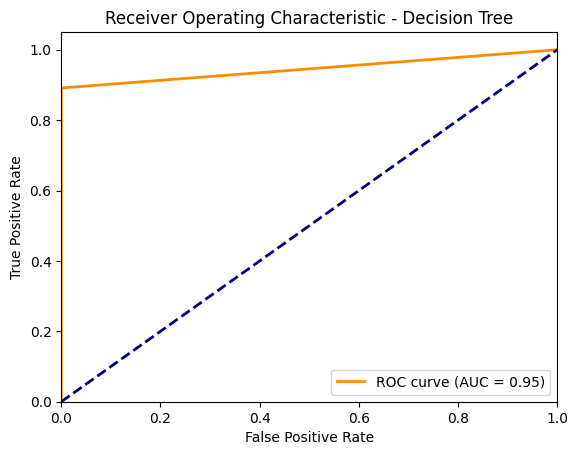

In [36]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Get the predicted probabilities for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

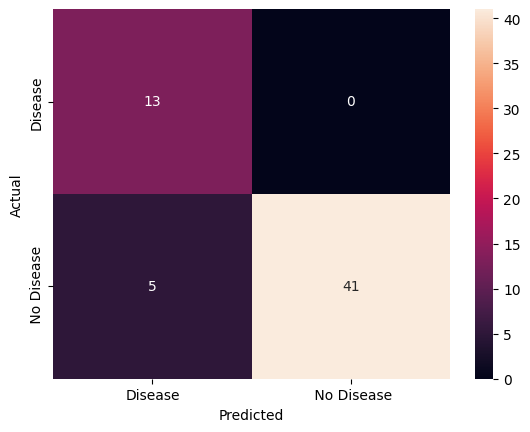

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
labels=['Disease', ' No Disease']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
def plot_gt_vs_pred(gt_array, pred_array):
    title =['Train', 'Train', 'Test', 'Test']
    plot_vars = [(gt_array[0], pred_array[0]), (gt_array[1], pred_array[1])]
    fig, axes = plt.subplots(2,2, figsize=(15,11))
    for idx, ax in enumerate(axes.flatten()):
        gt, pred = plot_vars[idx>=2]
        if np.mod(idx, 2) == 0:
            ax.scatter(np.arange(len(gt)), gt, label='ground truth')
            ax.scatter(np.arange(len(gt)), pred, label='prediction')
            ax.legend()
            ax.set_xlabel('# of beneficiary')
            ax.set_ylabel('Charges [$]')
            ax.set_title(title[idx])
        else:        
            sns.histplot(gt - pred, ax=ax, kde=True, fill=True, alpha=0.3, linewidth=0)
            ax.set_title(title[idx])
            ax.set_xlabel('ground truth - prediction')
            ax.set_ylabel('pdf')
    plt.show()

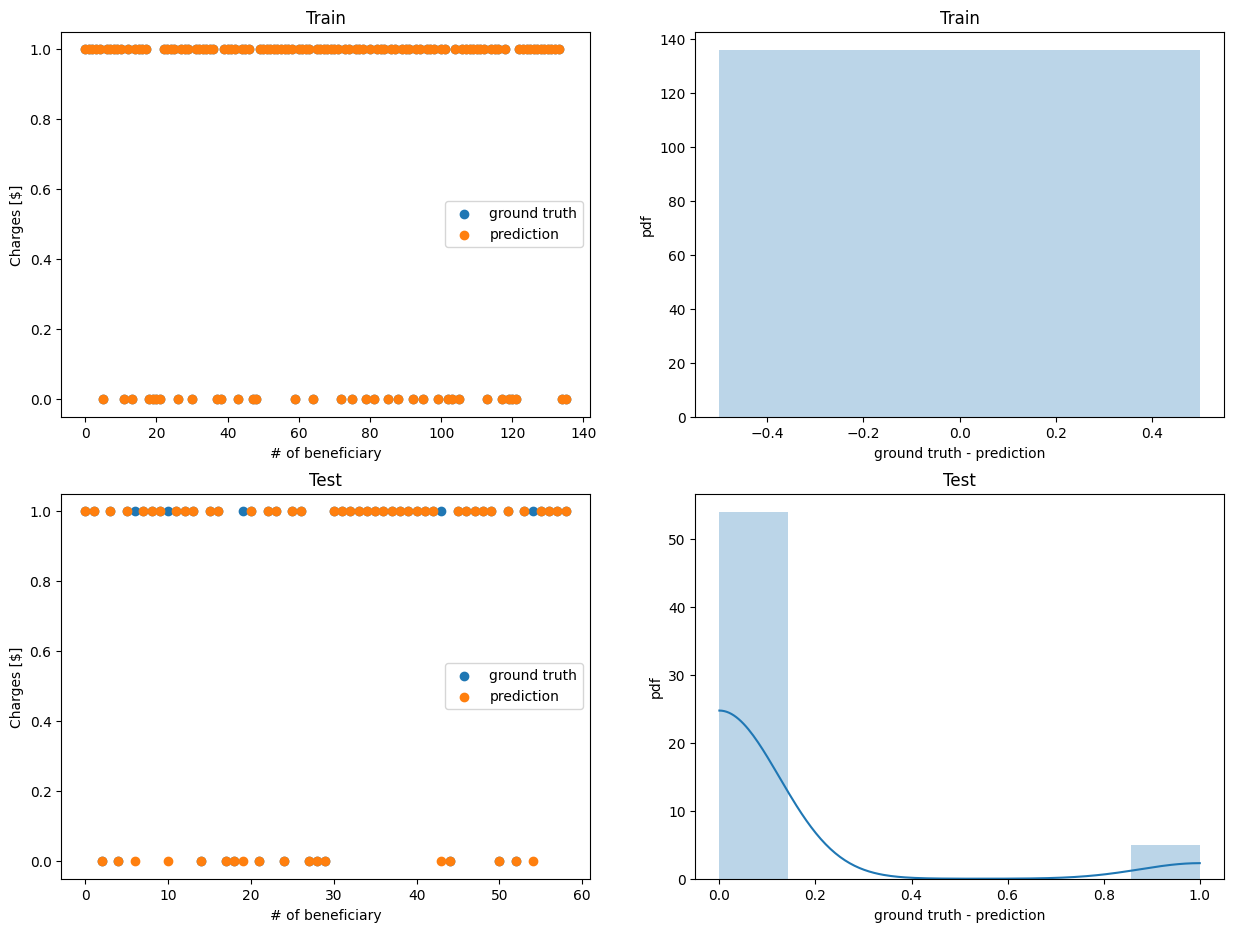

In [19]:
plot_gt_vs_pred(gt_array, pred_array)